In [79]:
import random
import pandas as pd
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
import numpy as np
from sklearn.model_selection import train_test_split
import math
import warnings
warnings.filterwarnings('ignore')

column1=[]
column2=[]
class_label=[]
    

for i in range(200):
    x1=random.uniform(-60, 60)
    x2=random.uniform(-60, 60)

    if ((x1 +3*(x2)-2 )> 0):
        a =1
    else:
        a =-1
    column1.append(x1)
    column2.append(x2)
    class_label.append(a)

df=pd.DataFrame(column1, columns=['Column1'])
df['Column2']=column2
df['Class_Label']=class_label

df.head(5)

,Column1,Column2,Class_Label
0,-45.520287,39.139384,1
1,-56.878462,-28.048634,-1
2,25.527196,39.983543,1
3,-9.595551,-18.362675,-1
4,42.307822,27.511111,1


In [80]:
#dropping class_label to get only input values
Y=df['Class_Label']
X=df.drop(['Class_Label'],axis=1)
X=X.rename(columns={'Column1':'','Column2':''})
X_list = X.values.tolist()
X_arr = X.to_numpy()
Y_arr = Y.to_numpy()



#Reshaping so that plotting can be done
print(X_arr.shape)

Y_arr = np.reshape(Y_arr, (200,1))
print(Y_arr.shape)

(200, 2)
(200, 1)


In [81]:
#Splitting the data
X_train, X_test, y_train, y_test = train_test_split( X_arr, Y_arr, test_size=0.33, random_state = None)

In [82]:
#Reshaping so that plotting can be done
print(y_train.shape)
y_train = np.reshape(y_train, (134,))
print(y_train.shape)

y_test = np.reshape(y_test, (66,))
print(y_test.shape)

(134, 1)
(134,)
(66,)


In [83]:
# Activation function
def activation(X):
    return np.where(X>=0, 1, -1)

In [84]:
# Training
def batch_training_fit(X, y, X_test, eta, epochs,reinit_weights=False):
    weights=np.random.uniform(0,0.5,(1 + X.shape[1]))
    errorsList = []
    w_=[]
    wi_=[]
    for _ in range(epochs):
            errors = 0
            w_=0
            wi_=0
            for xi, target in zip(X, y):
                s_t = np.dot(xi, weights[1:]) + weights[0]
                pred = activation(s_t)
                w_ += eta * (target - pred)*xi
                wi_ += eta * (target - pred)
                errors+=(target-pred)**2
                
            weights[1:] += w_ 
            weights[0] += wi_
            errorsList.append(errors)

    return pred,errorsList,weights


In [85]:
##Stochastic/Incremental Gradient Descent
class Incremental_Training():


    def __init__(self, eta, epochs):
        self.eta = eta
        self.epochs = epochs
        self.weights = None
        self.bias = None
        

    def fit(self, X, y, reinit_weights=True):
        global incrw_count
        self.errors_=[]
        self.ex=[]
        if reinit_weights:
            self.w = np.zeros(1 + X.shape[1])
        self.incrcost = []
        incrw_count=0

        for i in range(self.epochs):
            for xi, target in zip(X, y):
                res = self.activation(xi)
                error = target - res
                error1=error**2
                self.w[1:] += self.eta * xi.dot(error)
                self.w[0] += self.eta * error
                incrw_count += 1
            cost = ((y - self.activation(X))**2).sum() / 2.0
            self.incrcost.append(cost)
            self.errors_.append(error)
        print("Weight Updates for Incremental Gradient Descent:" +str(incrw_count))
        return self

    
    def activation(self, X):
        return np.dot(X, self.w[1:]) + self.w[0]

    def predict(self, X):
        return np.where(self.activation(X) >= 0.0, 1, -1)

In [86]:
def NN_Training_Batch(eta,epochs):
        predictions,errors,weights = batch_training_fit(X_train,y_train, X_test,eta, epochs,False)
        return predictions, errors, weights


In [87]:
def NN_Training_Incremental(eta,epochs):
    ppn = Incremental_Training(eta, epochs)
    ppn.fit(X_train, y_train)
    predictions = ppn.predict(X_test)
    return predictions , ppn.errors_, ppn.weights , ppn

In [88]:
def accuracy(y_true, pred):
    accuracy = np.sum(y_true == pred)/ len(y_true)
    return accuracy



In [89]:
def plot_error(errors,epochs):
    
    plt.plot(range(1, len(errors) + 1), errors, marker = 'o')
    plt.xlabel('Epochs')
    plt.ylabel('Error for training set')
    plt.title('Training Error vs No. of Epochs-'+str(epochs))
    plt.show()

In [90]:
def plot_decision_surface(X_train, y_train, NN_object,i):
    
    plot_decision_regions(X_train, y_train, clf=NN_object)
    plt.title('Decision Surface for '+str(i)+' epochs')
    plt.xlabel('Attribute 1')
    plt.ylabel('Attribute 2')
    plt.show()

In [91]:
import timeit

def learning_rate_analysis_Batch():
    
    learning_rates=[0.01,0.001,0.0001,0.00001]
    for i in learning_rates:
        t_0 = timeit.default_timer()
        predictions, errors, weights = NN_Training_Batch(i,100)
        t_1 = timeit.default_timer()
        elapsed_time = round((t_1 - t_0) * 10 ** 6, 3)
        print("Learning Rate :" , i)
        print("Weight vector:" , weights)
        print("weight updates are", len(errors))
        print("Accuracy:", accuracy(y_test, predictions))
        print('Elapsed time for learning rate '+str(i)+':'+'\033[1m'+str(elapsed_time)+'µs')
        plot_error(errors,100)
        


In [92]:
def learning_rate_analysis_Incremental():
    
    learning_rates=[0.01,0.001,0.0001,0.00001]
    for i in learning_rates:
        t_0 = timeit.default_timer()
        predictions, errors, weights,NN_object = NN_Training_Incremental(i,100)
        t_1 = timeit.default_timer()
        elapsed_time = round((t_1 - t_0) * 10 ** 6, 3)
        print("Learning Rate :" , i)
        print("Accuracy:", accuracy(y_test, predictions))
        print('Elapsed time for learning rate '+str(i)+':'+'\033[1m'+str(elapsed_time)+'µs')
        plot_error(errors,100)
        

In [93]:
class GraphDetails():
    def __init__(self, pred, errors, weights):
        self.pred = pred
        self.errors = errors
        self.weights = weights
    def predict(self, X):
        s_t = np.dot(X, self.weights[1:]) +self.weights[0]
        pred = activation(s_t)
        return pred

In [ ]:
#Question 1a,1b

No of epochs: 5
Weight vector: [ 0.26655311 13.1996359  41.76240266]
Accuracy: 0.48484848484848486


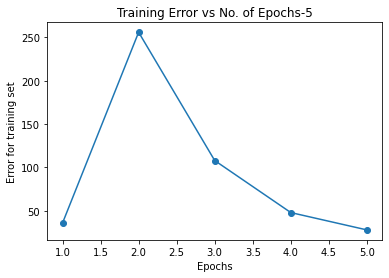

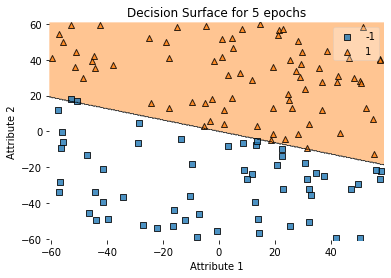

No of epochs: 10
Weight vector: [ 0.0903828  14.46124969 39.24830733]
Accuracy: 0.48484848484848486


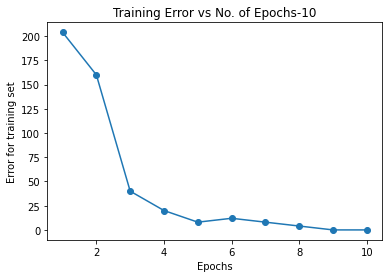

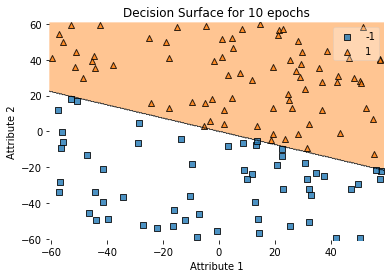

No of epochs: 50
Weight vector: [ 0.31727067 15.20263801 41.09853283]
Accuracy: 0.48484848484848486


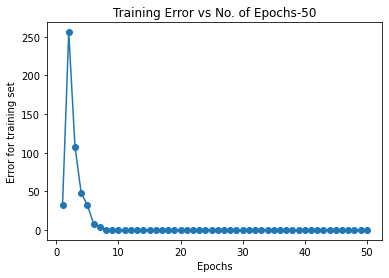

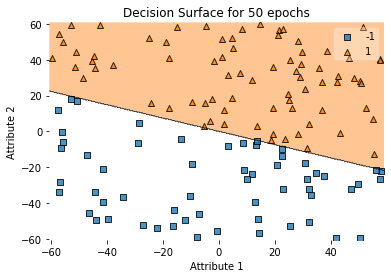

No of epochs: 100
Weight vector: [ 0.41204854 16.24394426 43.45881821]
Accuracy: 0.48484848484848486


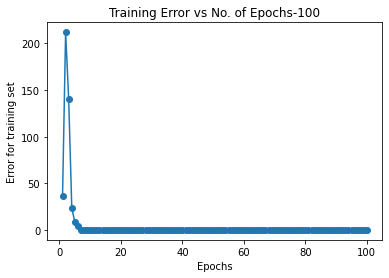

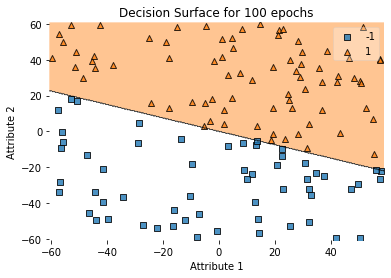

In [94]:
epochs=[5,10,50,100]

for i in epochs:
    
    predictions, errors, weights = NN_Training_Batch(0.01,i)
    print("No of epochs:" , i)
    print("Weight vector:" , weights)
    print("Accuracy:", accuracy(y_test, predictions))
    plot_error(errors,i)
    NN_object = GraphDetails(predictions, errors, weights)
    plot_decision_surface(X_train,y_train,NN_object,i)

In [ ]:
#Question 1c

Learning Rate : 0.01
Weight vector: [ 0.19397601 14.58719225 39.26889856]
weight updates are 100
Accuracy: 0.48484848484848486
Elapsed time for learning rate 0.01:147159.667µs


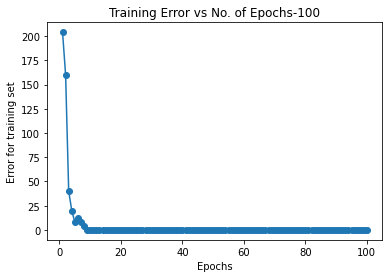

Learning Rate : 0.001
Weight vector: [0.00627479 1.18514793 3.23078194]
weight updates are 100
Accuracy: 0.48484848484848486
Elapsed time for learning rate 0.001:140902.583µs


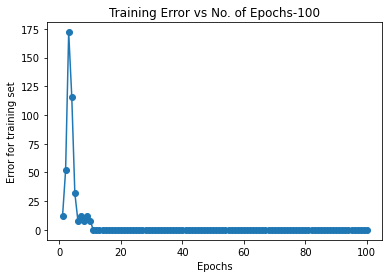

Learning Rate : 0.0001
Weight vector: [0.22014209 0.19452575 0.54462685]
weight updates are 100
Accuracy: 0.48484848484848486
Elapsed time for learning rate 0.0001:143797.791µs


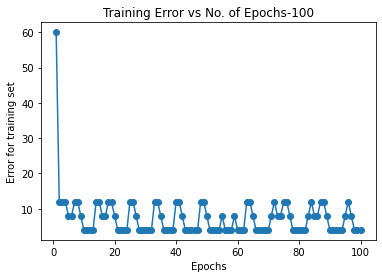

Learning Rate : 1e-05
Weight vector: [0.14274615 0.16691592 0.47326382]
weight updates are 100
Accuracy: 0.48484848484848486
Elapsed time for learning rate 1e-05:136973.75µs


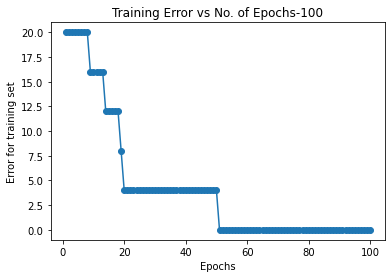

In [95]:
learning_rate_analysis_Batch()

In [96]:
#Question 1d

Weight Updates for Incremental Gradient Descent:670
No of epochs: 5


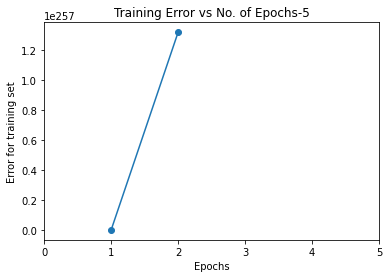

Weight Updates for Incremental Gradient Descent:1340
No of epochs: 10


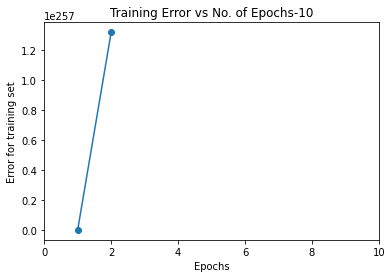

Weight Updates for Incremental Gradient Descent:6700
No of epochs: 50


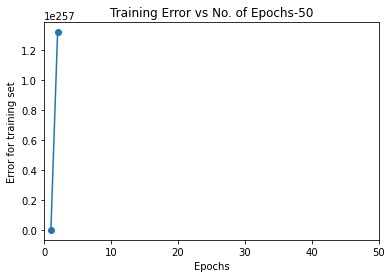

Weight Updates for Incremental Gradient Descent:13400
No of epochs: 100


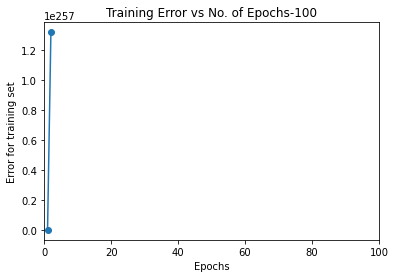

In [112]:
epochs=[5,10,50,100]

for i in epochs:
    
    predictions, errors, weights,NN_object= NN_Training_Incremental(0.01,i)
    print("No of epochs:" , i)
    
    
    #plot_error(errors,i)
    
    
    
    plt.plot(range(1, len(errors) + 1), errors, marker = 'o')
    plt.xlabel('Epochs')
    plt.ylabel('Error for training set')
    plt.xlim(0,i)
    plt.title('Training Error vs No. of Epochs-'+str(i))
    plt.show()

Weight Updates for Incremental Gradient Descent:13400
Learning Rate : 0.01
Accuracy: 0.48484848484848486
Elapsed time for learning rate 0.01:98539.958µs


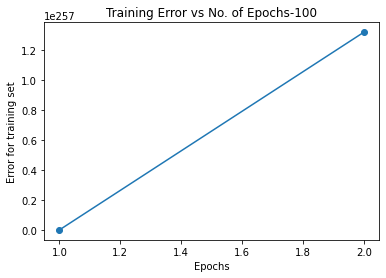

Weight Updates for Incremental Gradient Descent:13400
Learning Rate : 0.001
Accuracy: 0.48484848484848486
Elapsed time for learning rate 0.001:98097.208µs


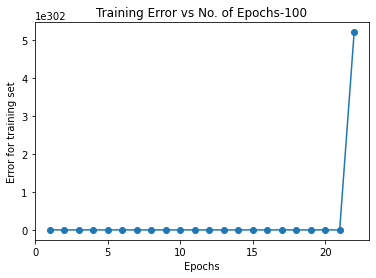

Weight Updates for Incremental Gradient Descent:13400
Learning Rate : 0.0001
Accuracy: 0.9696969696969697
Elapsed time for learning rate 0.0001:97043.541µs


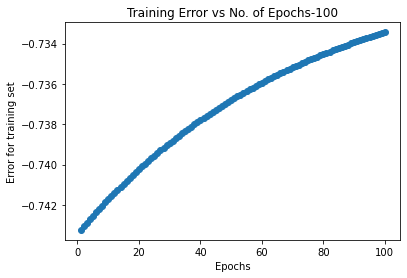

Weight Updates for Incremental Gradient Descent:13400
Learning Rate : 1e-05
Accuracy: 0.9545454545454546
Elapsed time for learning rate 1e-05:97152.958µs


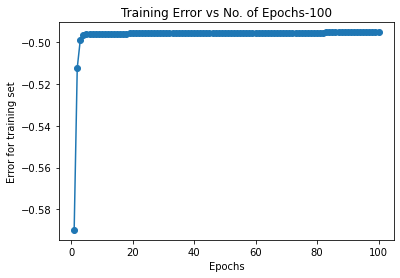

In [98]:
learning_rate_analysis_Incremental()

In [ ]:
#Question 2a

In [99]:
def decaying_lr_fit(X, y, X_test, eta, epoch):
    c=X.shape[1]
    weights=np.random.uniform(0,0.5,(1 + c))
    errorsList = []
    w_=[]
    wi_=[]
    learning_rates=[]
    rand_no=0.6
    learning_rates.append(eta)
    for i in range(epoch):
            errors = 0
            w_=0
            wi_=0
            for xi, target in zip(X, y):
                s_t = np.dot(xi, weights[1:]) + weights[0]
                pred = activation(s_t)
                w_ += eta * (target - pred)*xi
                wi_ += eta * (target - pred)
                errors+=(target-pred)**2
                
            weights[1:] += w_ 
            weights[0] += wi_
            eta=eta * (math.pow(rand_no, i-1))
            learning_rates.append(eta)
            errorsList.append(errors)
    s_t = np.dot(X_test, weights[1:]) + weights[0]
    pred = activation(s_t)
    return pred, errorsList, weights

In [100]:

predictions_dlr, errors_dlr, weights = decaying_lr_fit(X_train, y_train, X_test, 0.001,100)

In [101]:
print("Metrics for Batch Learning with Decaying Learning Rates:")
print("No of epochs:" , 100)
print("Weight vector:" , weights)
print("Accuracy:", accuracy(y_test, predictions_dlr))

Metrics for Batch Learning with Decaying Learning Rates:
No of epochs: 100
Weight vector: [0.22007207 1.62857779 4.95247416]
Accuracy: 0.9696969696969697


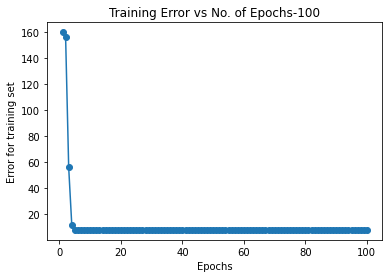

In [102]:
#plot error vs_epochs for batch decaying 
plot_error(errors_dlr,100)

In [103]:
#stochastic gradient descent for Decaying learning rates

In [104]:
# Training
def incremental_dlr_fit(X, y, X_test, eta, epoch):
    c=X.shape[1]
    weights=np.random.uniform(0,0.5,(1 + c))
    errorList = []
    learning_rates=[]
    rand_no=0.6
    learning_rates.append(eta)

    for i in range(epoch):
            errors = 0
            for xi, target in zip(X, y):
                s_t = np.dot(xi, weights[1:]) + weights[0]
                pred = activation(s_t)
                w_ = eta * (target - pred)
                weights[1:] += w_ * xi
                weights[0] += w_
                errors+=(target-pred)**2
                self_lr= eta * (math.pow(rand_no, i)) 
                learning_rates.append(eta)
            errorList.append(errors)
    s_t = np.dot(X_test, weights[1:]) + weights[0]
    pred = activation(s_t)
    return pred, errorList, weights

In [105]:
predictions_dlr, errors_dlr, weights_dlr = incremental_dlr_fit(X_train, y_train, X_test, 0.001, 100)

In [106]:
print("Metrics for Incremental Learning with Decaying Learning Rates:")
print("No of epochs:" , 100)
print("Weight vector:" , weights_dlr)
print("Accuracy:", accuracy(y_test, predictions_dlr))

Metrics for Incremental Learning with Decaying Learning Rates:
No of epochs: 100
Weight vector: [-0.00595091  0.15816869  0.44049091]
Accuracy: 0.9848484848484849


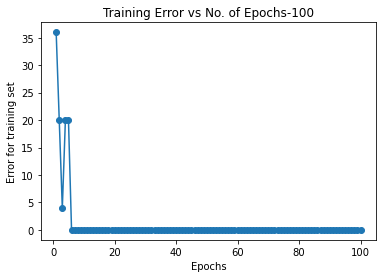

In [107]:
#Plotting the graph
plot_error(errors_dlr,100)

In [109]:
def predict(X,w):
    t=np.dot(X, w[1:])
    s_t = t+ w[0]
    pred = activation(s_t)
    return pred

In [ ]:
#Question 2b

In [110]:
def adaptive_learning_fit(X, y, X_test, t, d, D, lr, epoch):
        w = np.zeros(1 + X.shape[1])
        errorList = []
        adapw_count=0

        error_old = np.zeros(X.shape[0])
        error = np.zeros(X.shape[0])

        for i in range(epoch):
            res = predict(X,w)
            error = y - res
            w[1:] += lr *  X.T.dot(error)
            w[0] += lr * error.sum()

            for j in range(0,70):
            
                if error[j] - error_old[j] < t:
                    lr *= d
                    w[1:] += lr *  X.T.dot(error)
                    w[0] += lr * error.sum()
                elif (error[j] > error_old[j]):
                    lr *= D
            e= (error).sum() / 2.0
            errorList.append(e)

        t=np.dot(X, w[1:])
        s_t = t+w[0]
        pred = activation(s_t)
        return pred, errorList, w

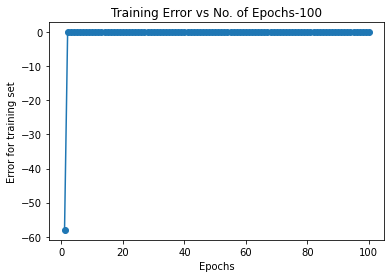

In [111]:
predictions, errors, weights = adaptive_learning_fit( X_train, y_train,X_test, 0.03,0.9,1.2, 0.5, 100)
plot_error(errors,100)